In [1]:
import numpy as np
import pandas as pd
#from police_api import PoliceAPI
#import glob,os
#import altair

Reading csv

In [2]:
df_crimes = pd.read_csv('crime_outcomes_all.csv')

In [3]:
df_stop_search = pd.read_csv('crime_stopnsearch_all.csv')

In [4]:
df_street = pd.read_csv('crime_street_all.csv')

Drop empty columns

In [5]:
df_crimes = df_crimes.drop(columns='Unnamed: 0')
df_stop_search = df_stop_search.drop(columns='Unnamed: 0')
df_street = df_street.drop(columns={'Unnamed: 0','Context'})

In [6]:
print(df_stop_search.columns)
df_crimes.columns
df_street.columns
print(df_stop_search.columns.intersection(df_crimes.columns))
print(df_crimes.columns.intersection(df_street.columns))

Index(['Unnamed: 0', 'Type', 'Date', 'Part of a policing operation',
       'Policing operation', 'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing', 'force'],
      dtype='object')
Index(['Unnamed: 0', 'Latitude', 'Longitude'], dtype='object')
Index(['Unnamed: 0', 'Crime ID', 'Month', 'Reported by', 'Falls within',
       'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name'],
      dtype='object')


In [7]:
#df_stop_search['Object of search'].value_counts()
#df_stop_search[df_stop_search['Object of search']=='Crossbows']
df_crimes['Outcome type'].value_counts()

Investigation complete; no suspect identified          2227959
Unable to prosecute suspect                            1364738
Suspect charged                                         490428
Local resolution                                        108627
Offender given a caution                                 79193
Formal action is not in the public interest              56665
Further investigation is not in the public interest      52474
Action to be taken by another organisation               43401
Offender sent to prison                                  24832
Offender given a drugs possession warning                23723
Offender given community sentence                        19669
Defendant found not guilty                               13218
Offender given penalty notice                            13147
Offender fined                                           10638
Offender given suspended prison sentence                  9050
Suspect charged as part of another case                

In [6]:
df_stop_search['Date'] = pd.to_datetime(df_stop_search['Date'])

Get date for stop and search data 

In [7]:
df_stop_search['DayMonth'] = df_stop_search['Date'].apply(lambda x: "%d/%d/%d" % (x.day,x.month, x.year))

In [8]:
df_stop_search['Time'] = df_stop_search['Date'].apply(lambda x: "%d" % (x.hour))

In [48]:
df_street['Crime type'].value_counts()

Violence and sexual offences    1777912
Anti-social behaviour           1410693
Criminal damage and arson        581665
Other theft                      550911
Vehicle crime                    465976
Public order                     433957
Burglary                         428537
Shoplifting                      377850
Drugs                            147781
Other crime                      103060
Theft from the person            101079
Bicycle theft                     96424
Robbery                           82339
Possession of weapons             45674
Name: Crime type, dtype: int64

Outcomes for each ethnicity

In [13]:
df_stop_search[df_stop_search['Officer-defined ethnicity']=='White']['Outcome'].value_counts()/len(df_stop_search[df_stop_search['Officer-defined ethnicity']=='White'])

A no further action disposal                                    0.636398
Arrest                                                          0.142661
Nothing found - no further action                               0.049541
Community resolution                                            0.049186
Khat or Cannabis warning                                        0.038910
Summons / charged by post                                       0.019206
Suspect arrested                                                0.013011
Penalty Notice for Disorder                                     0.010825
Caution (simple or conditional)                                 0.006266
Offender given drugs possession warning                         0.005775
Local resolution                                                0.004869
Article found - Detailed outcome unavailable                    0.002192
Suspect summonsed to court                                      0.001849
Offender given penalty notice                      

In [14]:
df_stop_search[df_stop_search['Officer-defined ethnicity']=='Black']['Outcome'].value_counts()/len(df_stop_search[df_stop_search['Officer-defined ethnicity']=='Black'])

A no further action disposal                    0.703906
Arrest                                          0.161927
Community resolution                            0.049567
Khat or Cannabis warning                        0.022770
Nothing found - no further action               0.015766
Penalty Notice for Disorder                     0.015535
Summons / charged by post                       0.013854
Suspect arrested                                0.005657
Caution (simple or conditional)                 0.001616
Local resolution                                0.001514
Offender given drugs possession warning         0.001001
Suspect summonsed to court                      0.000564
Article found - Detailed outcome unavailable    0.000513
Offender given penalty notice                   0.000308
Offender cautioned                              0.000128
Name: Outcome, dtype: float64

Police force efficiency

df_street['Last outcome category'].value_counts()
Unresolved 'Investigation complete; no suspect identified','Unable to prosecute suspect' 'Further investigation is not in the public interest'
Not yet resolved 'Under investigation' 'Status update unavailable' 'Awaiting court outcome'
Resolved 'Local resolution' 'Offender given a caution'

In [30]:
df_street[df_street['Falls within']=='Kent Police']['Last outcome category'].value_counts()

Unable to prosecute suspect                      74047
Investigation complete; no suspect identified    62960
Action to be taken by another organisation        8558
Under investigation                               8327
Status update unavailable                         3304
Awaiting court outcome                            2963
Offender given a caution                          1654
Offender sent to prison                           1421
Court result unavailable                          1227
Offender given community sentence                 1197
Local resolution                                  1150
Defendant found not guilty                         511
Offender given suspended prison sentence           496
Offender given conditional discharge               441
Offender given a drugs possession warning          437
Offender fined                                     383
Court case unable to proceed                       330
Offender given penalty notice                      225
Offender o

In [9]:
resolved = ['Offender given community sentence','Offender given a caution','Offender sent to prison',
             'Local resolution','Defendant found not guilty','Offender given suspended prison sentence',
            'Offender given conditional discharge','Offender given a drugs possession warning','Court result unavailable',
            'Offender given penalty notice','Offender otherwise dealt with','Offender fined','Suspect charged as part of another case',
            'Offender ordered to pay compensation','Offender given absolute discharge','Defendant sent to Crown Court','Offender deprived of property']
notresolved = ['Unable to prosecute suspect','Investigation complete; no suspect identified','Court case unable to proceed',
               'Formal action is not in the public interest']
waiting=['Under investigation','Awaiting court outcome','Status update unavailable','Action to be taken by another organisation']

def outcome(c):
  if c in waiting:
    return 'Awaiting resolution'
  elif c in notresolved:
    return 'No resolution'
  elif c in resolved:
    return 'Resolution'
print(outcome('Under investigation'))

df_street['Type of outcome'] = df_street['Last outcome category'].apply(outcome)


Awaiting resolution


In [46]:
df_street[df_street['Crime type']=='Violence and sexual offences']['Type of outcome'].value_counts()/len(df_street['Crime type']=='Violence and sexual offences')

No resolution          0.161377
Awaiting resolution    0.080977
Resolution             0.016625
Name: Type of outcome, dtype: float64

In [57]:
df_street.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Type of outcome'],
      dtype='object')

In [51]:
prosecuted = ['Offender given suspended prison sentence','Awaiting court outcome','Defendant found not guilty',
              'Offender sent to prison','Court result unavailable','Defendant sent to Crown Court','Offender given conditional discharge']

def prosecution(c):
    if c in prosecuted:
        return 'Prosecution'
    else:
        return'No prosecution/Unknown'
df_street['Prosecution'] = df_street['Last outcome category'].apply(prosecution)


In [ ]:
#pd.Series(np.intersect1d(df_street['Crime ID'], df_crimes['Crime ID']))
print(len(set(df_street['Crime ID']).intersection(df_crimes['Crime ID'])))
#print(len(df_crimes['Crime ID']))
#print(len(df_street['Crime ID']))
#print(len(df_street['Crime ID'])-df_street['Crime ID'].isna().sum())
#print(df_street['Crime ID'].isna().sum() + len(set(df_street['Crime ID']).intersection(df_crimes['Crime ID'])))

Plots

In [54]:
import altair
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df_street.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Type of outcome'],
      dtype='object')

In [31]:
#df_street['Type of outcome'].groupby('Month').agg({"duration": "sum"})
outcome_time = df_street.groupby('Month')['Type of outcome'].value_counts()

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
noresolution = np.array(outcome_time[0::3])
awaiting = np.array(outcome_time[1::3])
resolution = np.array(outcome_time[2::3])
months = np.arange(1,13)

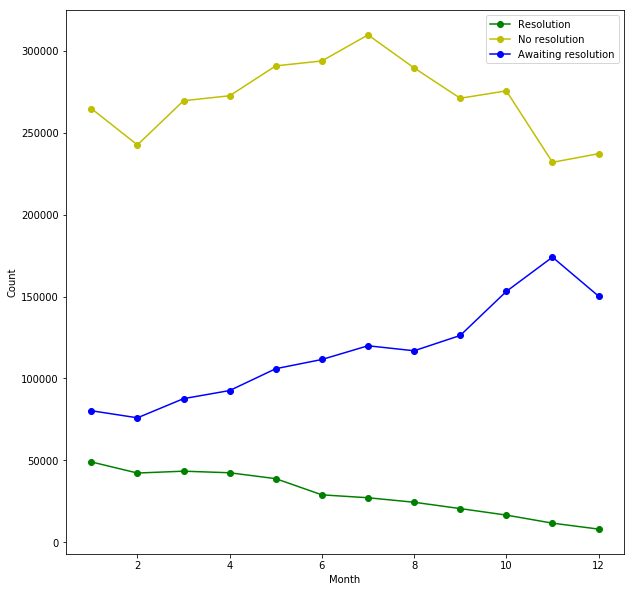

In [56]:
plt.figure(figsize=(10,10))
plt.plot(months,resolution,'go-',label='Resolution')
plt.plot(months,noresolution,'yo-',label='No resolution')
plt.plot(months,awaiting,'bo-',label='Awaiting resolution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.savefig('Resolutiontypes_vs_time.png')